# Advertising Sales Channel Prediction


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('Advertising.csv',index_col=0)

In [3]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
data.info

<bound method DataFrame.info of         TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


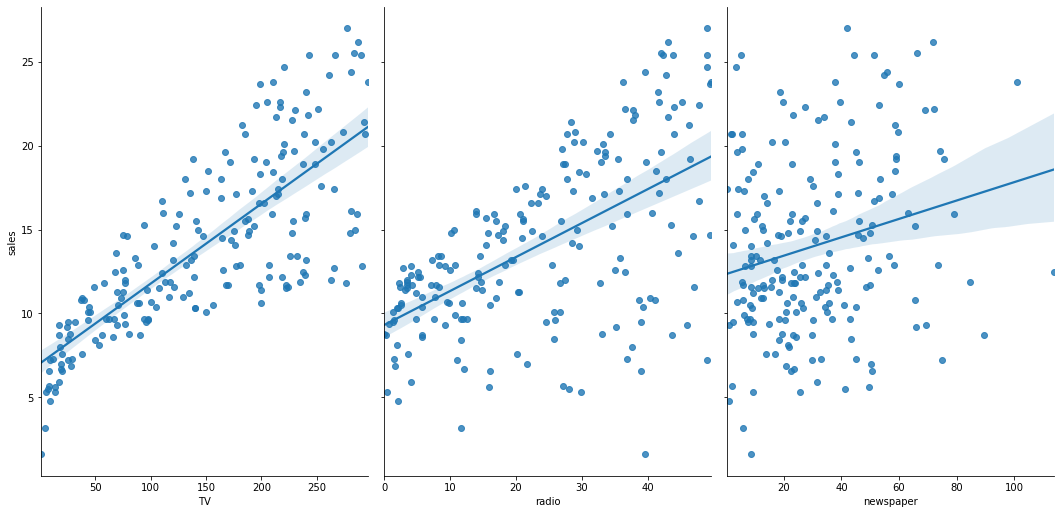

In [7]:
#plotting realtonship to understand relationship between features and result
sns.pairplot(data,x_vars=data.columns[:3],y_vars=data.columns[3:],size=7,aspect=0.7,kind='reg')

In [8]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [9]:
feature_cols=data.columns[:3]
#feature_cols = ['TV','radio','newspaper']   
X=data[feature_cols]

result_cols= data.columns[3:]
#result_cols= ['sales']
Y=data[result_cols]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)
#default size is test_size=0.25 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 3)
(120, 1)
(80, 3)
(80, 1)


In [10]:
lnrg = LinearRegression()
lnrg.fit(x_train,y_train)

#formula of linear regression is y = bias + [coef1]x1 + [coef2]x2 + [coef3]x3... 

print("linear regression bias or intercept   => ",lnrg.intercept_)   #intercept=bias
print("linear regression coefficient         => ",lnrg.coef_)
print("feature columns                       => ",feature_cols)

linear regression bias or intercept   =>  [3.23594453]
linear regression coefficient         =>  [[ 0.04577518  0.19385648 -0.00882432]]
feature columns                       =>  Index(['TV', 'radio', 'newspaper'], dtype='object')


In [11]:
y_hat = lnrg.predict(x_test)
print( np.sqrt(metrics.mean_squared_error(y_test,y_hat)) )

1.7910187754481672


In [12]:
# Root Mean Square error wth TV and radio as features 
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.6806811900659138

In [13]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio','newspaper']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.7017782497977831

In [14]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.936229164595735

In [15]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio','newspaper']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.93951363500846

# using cross validation to check best features

In [16]:
#all features
feature_cols = ['TV','radio','newspaper']
X=data[feature_cols]
Y=data.sales
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores  #cross_val_score give result in negative result so we negate it to get positive result
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

# the less the better

1.6913531708051792


In [17]:
# with some features
feature_cols = ['TV','radio']
X=data[feature_cols]
Y=data.sales
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

1.6796748419090766
